# Flight Price Predcitions

In [2]:
# import the libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# my info
__author__ = 'Shreyash Patra'

# Discover

## Load the data

In [3]:
path = 'Data_Train.xlsx'
flight_train = pd.read_excel(path)
path = 'Test_set.xlsx'
flight_test = pd.read_excel(path)

## Description

In [4]:
print('Statistical decription of the data ')
print(flight_train.describe())
print(flight_test.describe())

Statistical decription of the data 
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000
            Airline Date_of_Journey Source Destination            Route  \
count          2671            2671   2671        2671             2671   
unique           11              44      5           6              100   
top     Jet Airways       9/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq            897             144   1145        1145              624   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count      2671         2671     2671        2671            2671  
unique      199          704      320           5               6  
top       10:00        19:00   2h 50m      1 stop         No info  
freq         62          113      122        1431            2148  


In [3]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
flight_test.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


# Clean the data

### Heatmap

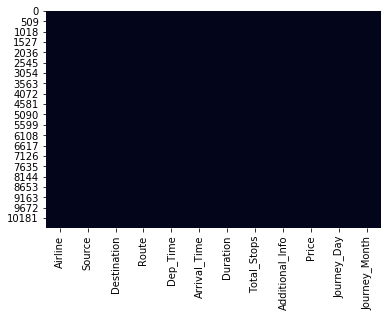

In [7]:
sns.heatmap(flight_train.isnull(), cbar=False)

In [5]:
# Dealing with the Missing Value

print("Original Length of Training Set : ", len(flight_train))

flight_train = flight_train.dropna()

print("Length of Training Set after dropping NaN: ", len(flight_train))

Original Length of Training Set :  10683
Length of Training Set after dropping NaN:  10682


The Date_of_Journey column contains dates in string format. Convert the strings in to pandas datetime object.

Split the date into days and months.

In [6]:
# Cleaning Journey Date 

# Training Set

flight_train['Journey_Day'] = pd.to_datetime(flight_train.Date_of_Journey, format='%d/%m/%Y').dt.day

flight_train['Journey_Month'] = pd.to_datetime(flight_train.Date_of_Journey, format='%d/%m/%Y').dt.month

# Test Set

flight_test['Journey_Day'] = pd.to_datetime(flight_test.Date_of_Journey, format='%d/%m/%Y').dt.day

flight_test['Journey_Month'] = pd.to_datetime(flight_test.Date_of_Journey, format='%d/%m/%Y').dt.month

# Compare the dates and delete the original date feature

flight_train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

flight_test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

Make all rows symmetric by adding "0m" where minute is not mentioned and "0h" where hour is not mentioned. Now, I split it in to 2 integer values.

In [8]:
# Cleaning Duration

# Training Set

duration = list(flight_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_train['Duration_hours'] = dur_hours
flight_train['Duration_minutes'] =dur_minutes

flight_train.drop(labels = 'Duration', axis = 1, inplace = True)


# Test Set

durationT = list(flight_test['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()) != 2:
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    dur_minutes.append(int(durationT[i].split()[1][:-1]))
  
    
flight_test['Duration_hours'] = dur_hours
flight_test['Duration_minutes'] = dur_minutes

flight_test.drop(labels = 'Duration', axis = 1, inplace = True)

I split the Dep_Time and Arrival_Time features in to two features each, hours and minutes.

In [9]:
# Cleaning Departure and Arrival Times

# Training Set


flight_train['Depart_Time_Hour'] = pd.to_datetime(flight_train.Dep_Time).dt.hour
flight_train['Depart_Time_Minutes'] = pd.to_datetime(flight_train.Dep_Time).dt.minute

flight_train.drop(labels = 'Dep_Time', axis = 1, inplace = True)


flight_train['Arr_Time_Hour'] = pd.to_datetime(flight_train.Arrival_Time).dt.hour
flight_train['Arr_Time_Minutes'] = pd.to_datetime(flight_train.Arrival_Time).dt.minute

flight_train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)


# Test Set


flight_test['Depart_Time_Hour'] = pd.to_datetime(flight_test.Dep_Time).dt.hour
flight_test['Depart_Time_Minutes'] = pd.to_datetime(flight_test.Dep_Time).dt.minute


flight_test.drop(labels = 'Dep_Time', axis = 1, inplace = True)

flight_test['Arr_Time_Hour'] = pd.to_datetime(flight_test.Arrival_Time).dt.hour
flight_test['Arr_Time_Minutes'] = pd.to_datetime(flight_test.Arrival_Time).dt.minute

flight_test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [11]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35


In [12]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


# EDA

In [10]:
print('Number of features/columns: ', len(flight_train.columns))
print('Features/Columns: ')
flight_train.columns

Number of features/columns:  15
Features/Columns: 


Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_minutes', 'Depart_Time_Hour',
       'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes'],
      dtype='object')

In [11]:
print('Number of observations: ', len(flight_train))

Number of observations:  10682


In [12]:
# looking for NaN values
print(flight_train.isnull().values.any())
print(flight_test.isnull().values.any())

False
False


In [13]:
print('Total number of NaN values: ')
flight_train.isnull().values.sum()

Total number of NaN values: 


0

In [62]:
flight_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,2,25,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,15,30,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,21,5,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,25,30,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,7,50,11,25,19,15


## Box plot

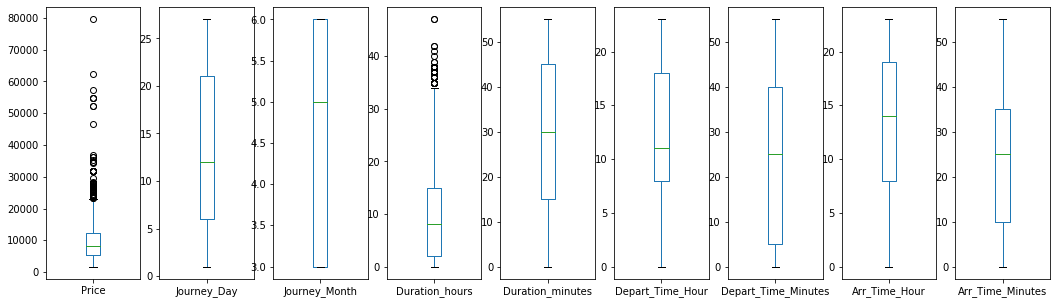

In [50]:
flight_train.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(18,5))
plt.show()

## Histogram

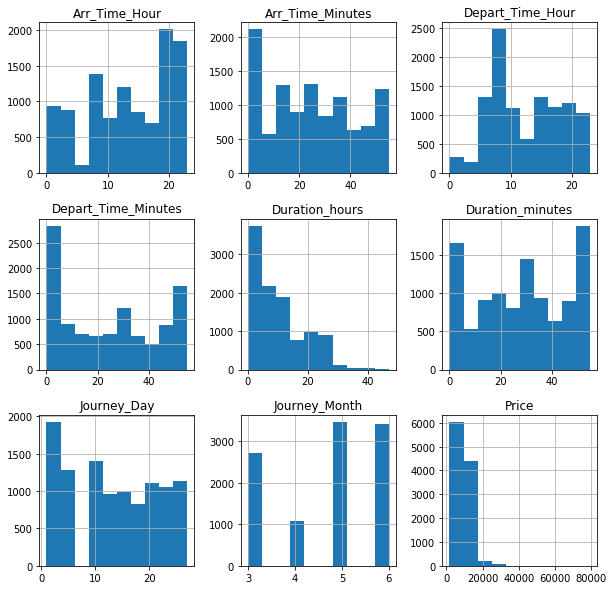

In [60]:
flight_train.hist(figsize=(10,10))
plt.show()

## Distribution plot

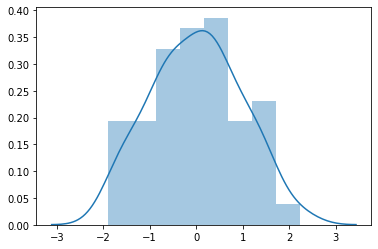

In [59]:
x = np.random.normal(size=100)
sns.distplot(x);

## Classifying Dependent & Independent Variables

In [14]:
# Dependent Variable
Y_train = flight_train.iloc[:,6].values  # 6 is the index of "Price" in the Training Set 

# Independent Variables
X_train = flight_train.iloc[:,flight_train.columns != 'Price'].values # selects all columns except "Price"

# Independent Variables for Test Set
X_test = flight_test.iloc[:,:].values

### Encoding Categorical Values

In [15]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

# Training Set    
X_train[:,0] = le1.fit_transform(X_train[:,0])
X_train[:,1] = le1.fit_transform(X_train[:,1])
X_train[:,2] = le1.fit_transform(X_train[:,2])
X_train[:,3] = le1.fit_transform(X_train[:,3])
X_train[:,4] = le1.fit_transform(X_train[:,4])
X_train[:,5] = le1.fit_transform(X_train[:,5])

# Test Set
X_test[:,0] = le2.fit_transform(X_test[:,0])
X_test[:,1] = le2.fit_transform(X_test[:,1])
X_test[:,2] = le2.fit_transform(X_test[:,2])
X_test[:,3] = le2.fit_transform(X_test[:,3])
X_test[:,4] = le2.fit_transform(X_test[:,4])
X_test[:,5] = le2.fit_transform(X_test[:,5])

### Data after encoding

In [16]:
print(pd.DataFrame(X_train).head())

  0  1  2    3  4  5   6  7   8   9   10  11  12  13
0  3  0  5   18  4  8  24  3   2  50  22  20   1  10
1  1  3  0   84  1  8   1  5   7  25   5  50  13  15
2  4  2  1  118  1  8   9  6  19   0   9  25   4  25
3  3  3  0   91  0  8  12  5   5  25  18   5  23  30
4  3  0  5   29  0  8   1  3   4  45  16  50  21  35


### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
Y_train = Y_train.reshape((len(Y_train), 1)) 
Y_train = sc_X.fit_transform(Y_train)
Y_train = Y_train.ravel()

### Data after scaling

In [18]:
print(pd.DataFrame(X_train).head())

         0         1         2         3         4         5         6   \
0 -0.410805 -1.658359  2.416534 -1.547082  1.407210  0.499921  1.237288   
1 -1.261152  0.890014 -0.973812  0.249946 -0.253703  0.499921 -1.475307   
2  0.014369  0.040556 -0.295743  1.175687 -0.253703  0.499921 -0.531796   
3 -0.410805  0.890014 -0.973812  0.440539 -0.807341  0.499921 -0.177979   
4 -0.410805 -1.658359  2.416534 -1.247577 -0.807341  0.499921 -1.475307   

         7         8         9         10        11        12        13  
0 -1.467402 -0.970614  1.279041  1.654154 -0.234950 -1.800436 -0.890014  
1  0.250289 -0.381999 -0.196319 -1.303113  1.363607 -0.050909 -0.587094  
2  1.109135  1.030677 -1.671678 -0.607286  0.031476 -1.363054  0.018745  
3  0.250289 -0.617445 -0.196319  0.958326 -1.034229  1.407030  0.321664  
4 -1.467402 -0.735168  0.983969  0.610412  1.363607  1.115442  0.624584  


In [19]:
print(pd.DataFrame(Y_train).head())

          0
0 -1.125535
1 -0.309068
2  1.039783
3 -0.622209
4  0.914006


# Develop

## Modelling with Support Vector Regressor

In [20]:
from sklearn.svm import SVR

svr = SVR(kernel = "rbf")
svr.fit(X_train,Y_train)

Y_pred = sc_X.inverse_transform(svr.predict(X_test))

pd.DataFrame(Y_pred, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

In [24]:
outp = pd.read_excel('Final_Pred.xlsx')
print(outp.head(15))

           Price
0   10547.002077
1    6773.635780
2   11482.732670
3   11281.247128
4    4379.175423
5   11115.109702
6    7662.187180
7    8986.114570
8    3305.391285
9   12187.046543
10   8353.814857
11  10815.296662
12  12829.057146
13  10294.446131
14  11469.464031
